In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from dataset import XinguDataset
import albumentations as A
from albumentations.pytorch import ToTensorV2


In [26]:
# Define an example transform pipeline
transform = A.Compose([
    A.Resize(256, 256),          # Resize the image and mask to a fixed size
    A.Rotate(limit=90, p=0.8),          # Randomly rotate the image by 90 degrees
    A.HorizontalFlip(),         # Randomly flip the image horizontally
    A.VerticalFlip(),           # Randomly flip the image vertically
    A.RandomBrightnessContrast(),# Randomly adjust brightness and contrast
    ToTensorV2(),                # Convert the image to PyTorch tensor
])

In [27]:
ds_no_aug = XinguDataset('selected_patches/train/images/', 'selected_patches/train/masks/', [4, 6, 7])
ds_aug = XinguDataset('selected_patches/train/images/', 'selected_patches/train/masks/', range(1, 8), transforms=transform) # testing for images with unorthodox dimensions

/home/ebneto/foresteyes/segmentation_xingu/dataset/dataset.py:34: UserWarning: Transforms are not implemented yet.
  warnings.warn('Transforms are not implemented yet.', UserWarning)


In [28]:
print(f'ds_no_aug: {len(ds_no_aug)} samples')
print(f'ds_aug: {len(ds_aug)} samples')

ds_no_aug: 996 samples
ds_aug: 996 samples


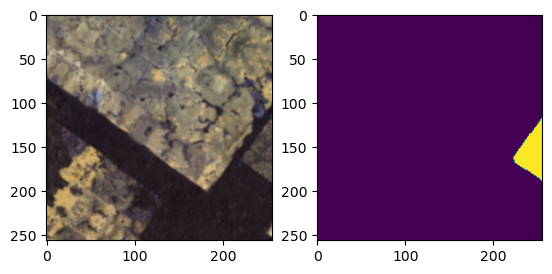

In [30]:
image, mask = ds_aug.__getitem__(93)
newimg = np.zeros((3, 256, 256))
# newimg[0, :,:] = image[0]
# newimg[1, :,:] = image[0]
# newimg[2, :,:] = image[0]
newimg = image[:3]
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(newimg.transpose(1, 2, 0))
ax[1].imshow(mask.squeeze())

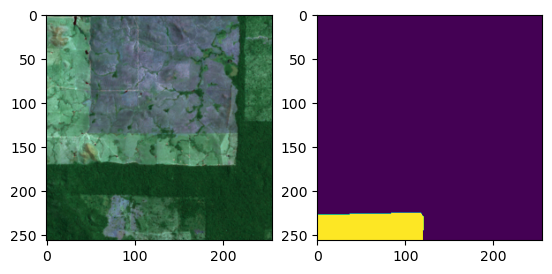

In [12]:
image, mask = ds_no_aug.__getitem__(90)
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(image.transpose(1, 2, 0))
ax[1].imshow(mask.squeeze())